### Import the libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from mpl_toolkits.mplot3d import Axes3D

### Get the data

In [2]:
# Get data from csv file
iris_file = pd.read_csv('./datasets/market.csv')
iris = pd.DataFrame(iris_file)

# Prepare the data
house_feature_names = iris.columns.values.tolist()[2:]
house_data = iris[house_feature_names]
house_target = iris[iris.columns.values.tolist()[0]]
house_target_names = list(set(house_target))

print('Features:',house_feature_names, '   Classes:', house_target_names)


Features: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']    Classes: ['IXIC', '000001.SS', 'GSPTSE', 'HSI', 'NYA']


#### Build the model and evaluate it
Decision trees, Naive bayes and KNN

In [3]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1234)


# Data selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house_data, house_target, test_size=0.33, random_state=27)


# Train the model on the training set
clf_model = clf.fit(X_train, y_train)


# Make predictions on new data
# X_new = np.array([[5.1, 3.5, 1.4, 0.2]])
# prediction = clf_model.predict(X_new)
# print("Prediction:", prediction)

# Evaluate the model on the test set
hd_score = clf_model.score(X_test, y_test)
print("Houldout test accuracy:", hd_score)

# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score
acc_score = cross_val_score(clf, X_train, y_train, cv=10)
print("CV Mean Accuracy: %0.3f (+/- %0.3f)" % (acc_score.mean(), acc_score.std()) )
f1_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print("Mean F1: %0.3f (+/- %0.3f)" % (np.mean(f1_score), np.std(f1_score)) )

# More metrics: Precision Recall scores and Confusion matrix
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training test\n")
print(metrics.classification_report(y_test, clf_model.predict(X_test), digits=3))
print(metrics.confusion_matrix(y_test, clf_model.predict(X_test)))



Houldout test accuracy: 0.9882352941176471
CV Mean Accuracy: 0.976 (+/- 0.029)
Mean F1: 0.968 (+/- 0.040)
Precision, Recall, Confusion matrix, in training test

              precision    recall  f1-score   support

   000001.SS      1.000     1.000     1.000        16
      GSPTSE      1.000     0.857     0.923         7
         HSI      0.950     1.000     0.974        19
        IXIC      1.000     1.000     1.000        35
         NYA      1.000     1.000     1.000         8

    accuracy                          0.988        85
   macro avg      0.990     0.971     0.979        85
weighted avg      0.989     0.988     0.988        85

[[16  0  0  0  0]
 [ 0  6  1  0  0]
 [ 0  0 19  0  0]
 [ 0  0  0 35  0]
 [ 0  0  0  0  8]]


Plot Tree with plot_tree

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['IXIC', '000001.SS', 'GSPTSE', 'HSI', 'NYA']


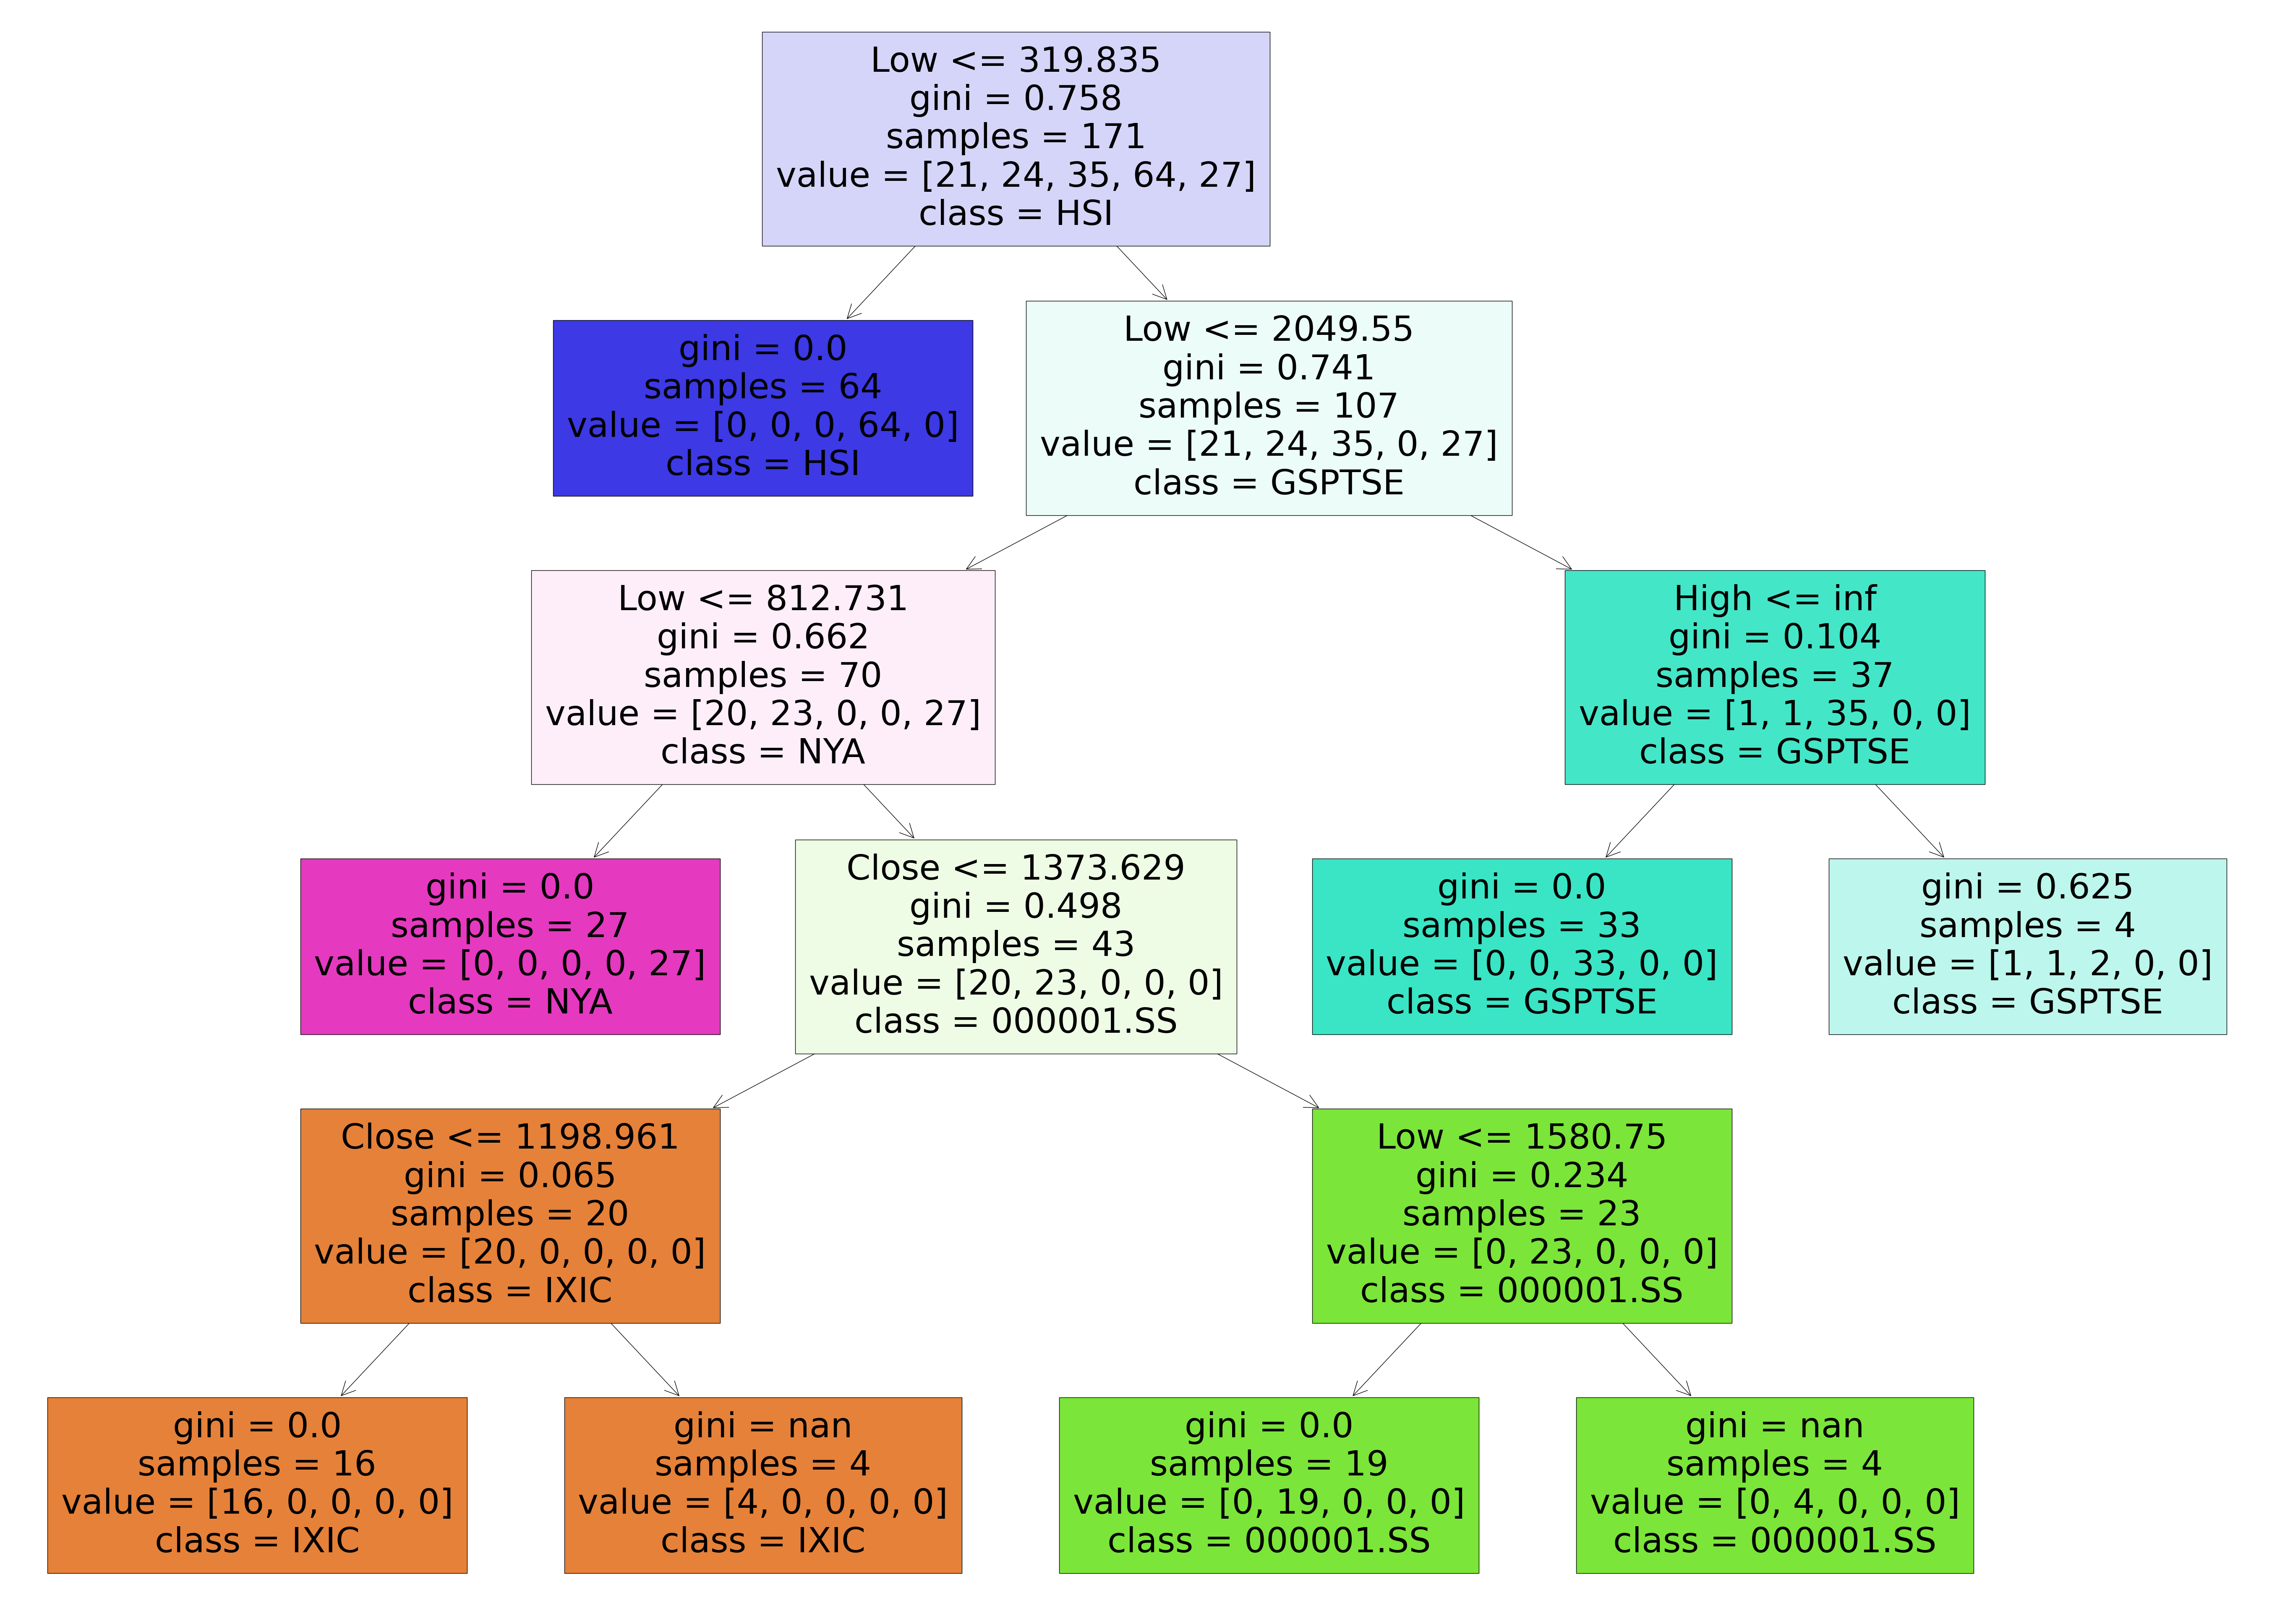

In [4]:
# If you have created the Decision Tree model
from sklearn import tree
from matplotlib import pyplot as plt

print(house_feature_names)
print(house_target_names)

fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(clf_model, 
                   feature_names=house_feature_names,  
                   class_names=house_target_names,
                   filled=True)

## Clustering with K-Means

In [ ]:
# Import datasets library
from sklearn import datasets
iris_file = pd.read_csv('./datasets/market.csv')
iris = pd.DataFrame(iris_file)

# Prepare the data
house_feature_names = iris.columns.values.tolist()[2:]
house_data = iris[house_feature_names]
house_target = iris[iris.columns.values.tolist()[0]]
house_target_names = list(set(house_target))

# Preliminary data exploration
print(house_data.shape)     # Output: (150, 4)
print(house_feature_names)  # Output: ['sepal length (cm)', ...]
print(house_data[:5])

# Preprocessing the data (standardize)
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(iris.data)
print(scaled_iris[:5])